In [1]:
# Navigate to the root of the project and import necessary libraries
from hydra import initialize, compose
initialize(config_path="../confs", job_name="notebook")

import sys
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))
# We change the working directory to the root of the project
# Run this only once
root_path = Path.cwd().parent
os.chdir(root_path)
sys.path.append(root_path / "src")

device = 'cpu'

/tmp/ipykernel_69295/451883383.py:3: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../confs", job_name="notebook")


# Exploratory notebook

This notebook is intended for developing purposes, and maybe some experiments. But most results will be available through the streamlit app.

## Load the image

In [2]:
from src.ocr.pipeline import GlobalPipeline
from src.ocr.patch_extraction import extract_patches
from PIL import Image
from src.data.patch_database import PatchDatabase

database = PatchDatabase()




pipeline = GlobalPipeline()
folder = Path('data/datasets/book1')
files = next(os.walk(folder))[2]


for i, file in enumerate(files[:10]):
    folder = Path('data/datasets/book1')
    print(f'Processing file N°{i+1}/{len(files)}')
    im_pil = Image.open(folder / file)
    results = pipeline.forward(img_pil=im_pil)
    database.add_image(im_pil, results.filteredCharacters)
    # results.filteredCharacters.save('data/extracted/components/book1/file')

    # patches, img_patches = extract_patches(results.filteredCharacters, image=np.array(results.img_pil), border=5)

    # for i, patch in enumerate(patches):
    #     folder = Path(f'data/extracted/patches_bin/book1/')
    #     filepath = f'patch-{i}-bin-file-{file}.jpg'
    #     Image.fromarray((patch*255).astype(np.uint8)).save(folder / filepath, quality=100)

    # for i, patch in enumerate(img_patches):
    #     folder = Path(f'data/extracted/patches_img/book1/')
    #     filepath = f'patch-{i}-bin-file-{file}.jpg'
    #     Image.fromarray(patch).save(folder / filepath, quality=100)

database.save('data/datasets/databases/book1-complete')

/home/mathis/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mathis/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Processing file N°1/38
Image dimensions: 4799 x 3510 x 3
Running CRAFT detection...
CRAFT detection completed
Detecting connected components from CRAFT score...
Found 567 initial text components
Filtering components by area and aspect ratio...
After filtering: 510 components remaining
Merging nearby components...
After merging: 508 final text components
Processing image components and binarization...
Image binarization completed
Found 2087 image components
After image filtering: 2072 components
Final character segmentation: 505 components
Pipeline completed successfully!
Processing file N°2/38
Image dimensions: 4799 x 3510 x 3
Running CRAFT detection...
CRAFT detection completed
Detecting connected components from CRAFT score...
Found 413 initial text components
Filtering components by area and aspect ratio...
After filtering: 364 components remaining
Merging nearby components...
After merging: 363 final text components
Processing image components and binarization...
Image binarization

In [2]:
from PIL import Image
import torch
import cv2

im_pil = Image.open('data/examples/ying_huan_zhi_lue_22_high.jpg')
# im_pil

## Run the pipeline

In [3]:
from src.ocr.pipeline import GlobalPipeline

pipeline = GlobalPipeline()

results = pipeline.forward(img_pil=im_pil)

/home/mathis/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mathis/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Image dimensions: 4799 x 3510 x 3
Running CRAFT detection...
CRAFT detection completed
Detecting connected components from CRAFT score...
Found 494 initial text components
Filtering components by area and aspect ratio...
After filtering: 483 components remaining
Merging nearby components...
After merging: 478 final text components
Processing image components and binarization...
Image binarization completed
Found 1981 image components
After image filtering: 1960 components
Final character segmentation: 475 components
Pipeline completed successfully!


In [4]:
from src.data.patch_database import PatchDatabase
# from src.data.patch_database

database = PatchDatabase()

database.add_image(im_pil, results.filteredCharacters)

database.save('data/datasets/databases/book1')

Saved database: 473 patches, 9 columns, 1 images


In [ ]:
database._

KeyboardInterrupt: 

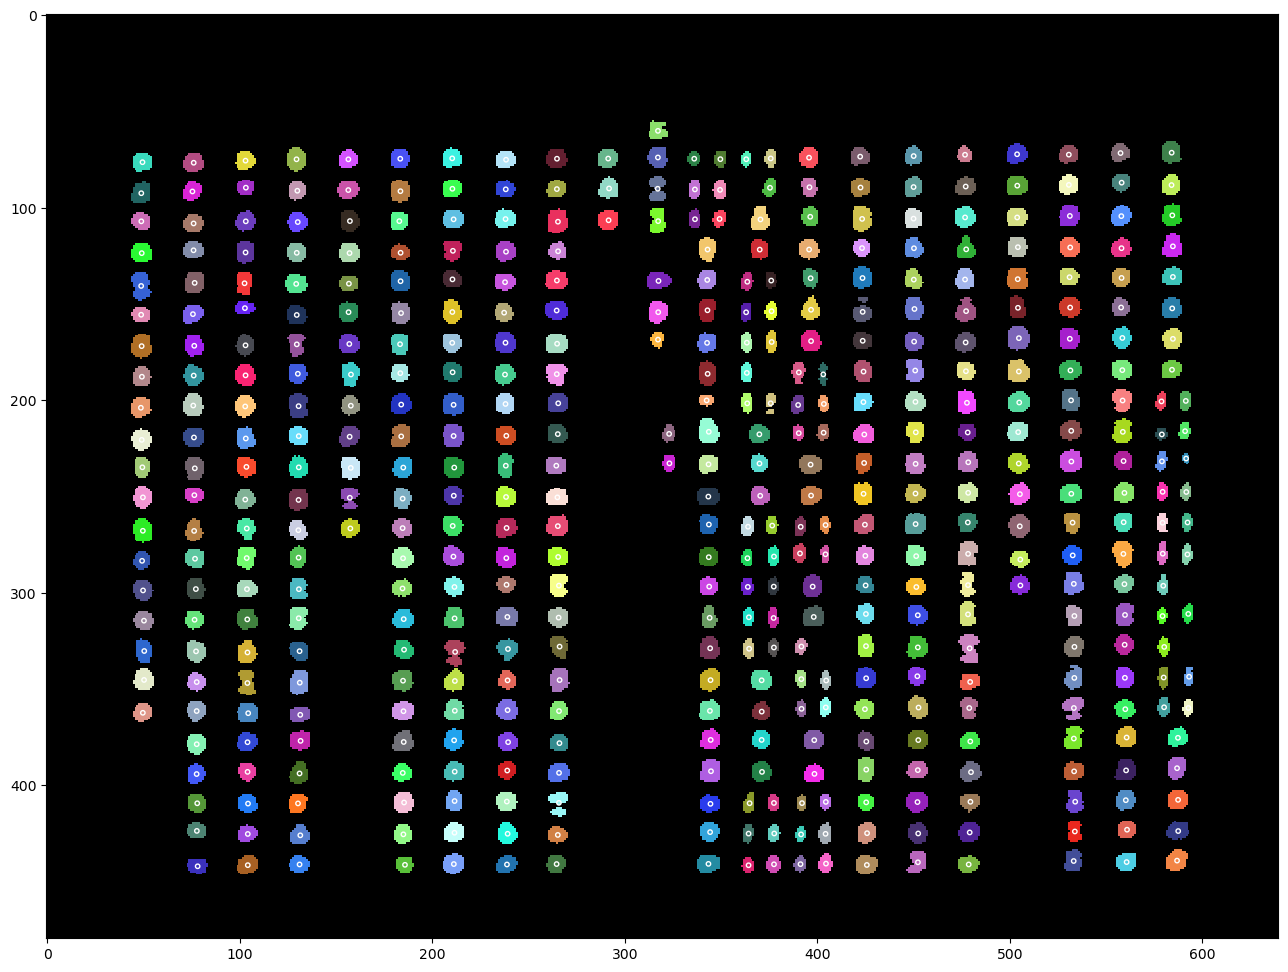

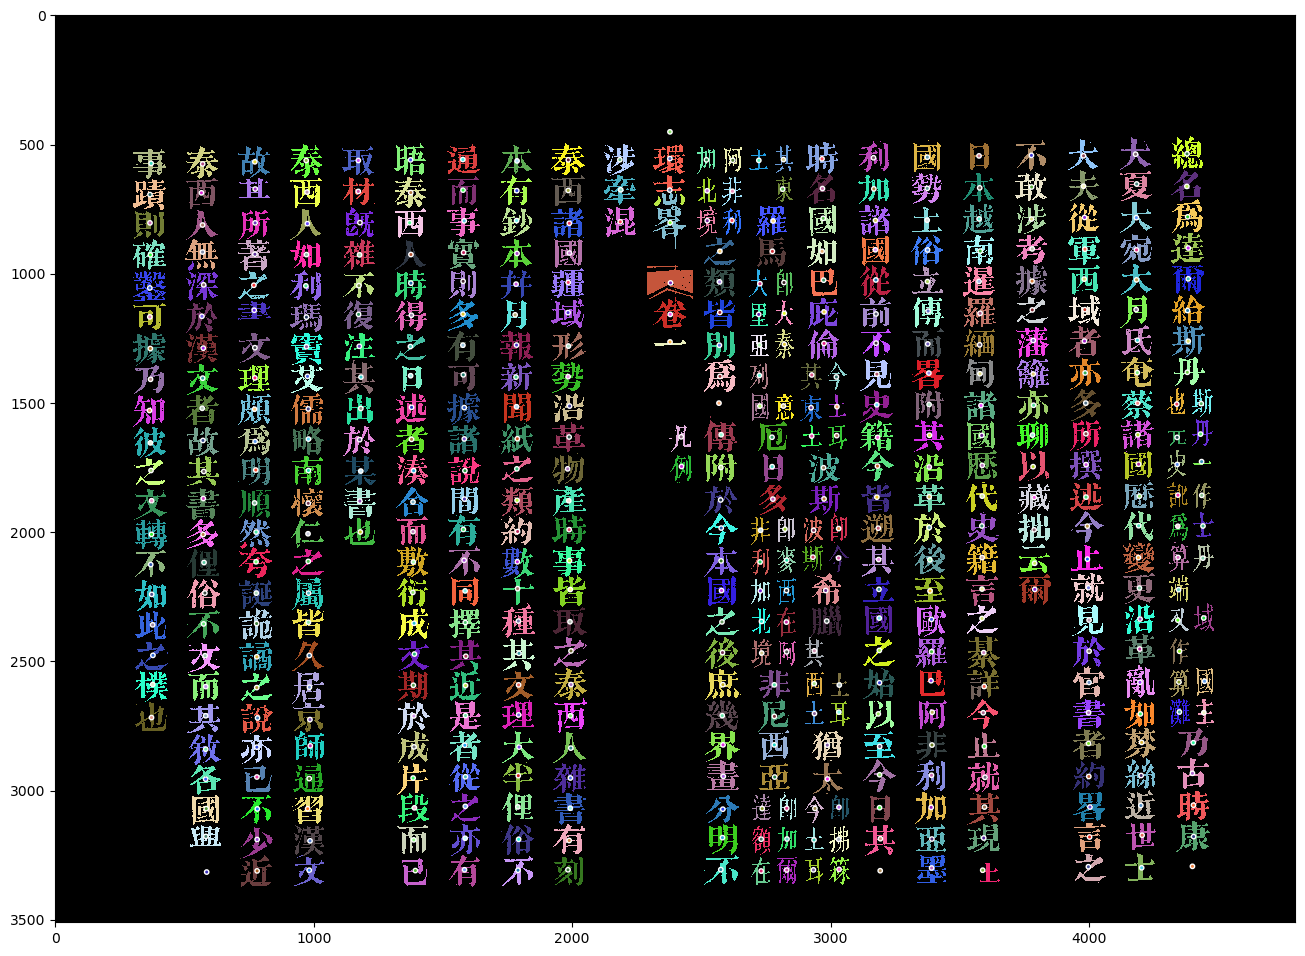

In [ ]:
centroids = [rgion.centroid[::-1] for rgion in results.merged_text_components.regions]
centroids = np.array(centroids)

plt.figure(figsize=(16,12))
plt.imshow(results.merged_text_components.segm_img, interpolation='nearest')
plt.scatter(centroids[:, 0], centroids[:, 1], s=10, c=results.merged_text_components.colors[1:] / 255, linewidths=1, edgecolors="white")
plt.show()


H, W = results.merged_text_components.labels.shape

centroids = pipeline.craftDetector.map_preprocessed_to_original(centroids*2, original_shape=(im_pil.height, im_pil.width))


plt.figure(figsize=(16,12))
plt.imshow(results.filteredCharacters.segm_img, interpolation='nearest')
plt.scatter(centroids[:, 0], centroids[:, 1], s=10, c=results.merged_text_components.colors[1:] / 255, linewidths=1, edgecolors="white")
plt.show()


In [ ]:
from src.ocr.patch_extraction import extract_patches

patches, img_patches = extract_patches(results.filteredCharacters, image=np.array(results.img_pil), border=5)

In [ ]:
results.filteredCharacters.save('data/extracted/components/filtered_characters')

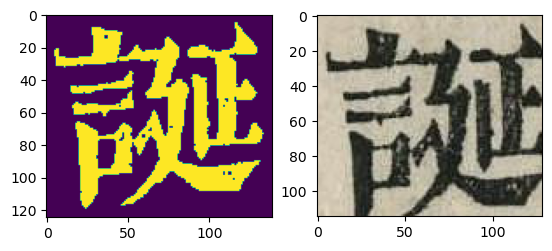

In [ ]:

i = np.random.randint(0, len(patches))
plt.subplot(1,2,1)
plt.imshow(patches[i])
plt.subplot(1,2,2)
plt.imshow(img_patches[i])


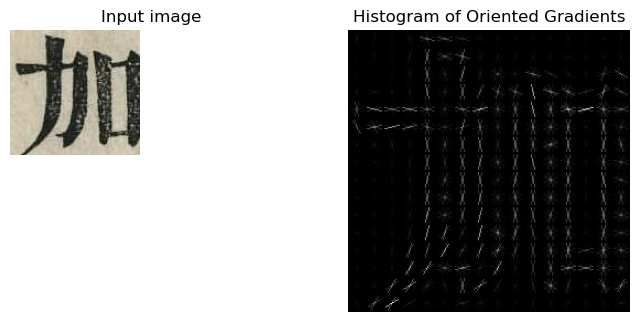

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import resize

i = np.random.randint(0, len(img_patches))

fd, hog_image = hog(
    resize(img_patches[i], (256, 256)),
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_patches[i], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
descriptors = []

for i in range(len(img_patches)):
    fd, hog_image = hog(
        resize(img_patches[i], (256, 256)),
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        visualize=True,
        channel_axis=-1,
    )
    descriptors.append(fd)

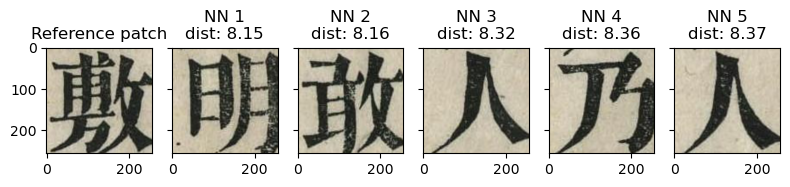

In [ ]:
from sklearn.neighbors import NearestNeighbors
n_neighs = 5
nbrs = NearestNeighbors(n_neighbors=n_neighs + 1).fit(np.array(descriptors))  # +1 to include self

i = np.random.randint(0, len(img_patches))
# i = 163

desc = descriptors[i]
img_patch = img_patches[i]

distances, indices = nbrs.kneighbors(desc[None, :])

fig, axs = plt.subplots(1, n_neighs + 1, figsize=(8, 4), sharex=True, sharey=True)

# Reference patch
ax = axs[0]
ax.imshow(resize(img_patch, (256, 256)))
ax.set_title('Reference patch')

# Nearest neighbors (skip the first result which is the reference patch itself)
for j, (idx, dist) in enumerate(zip(indices[0][1:], distances[0][1:]), 1):
    ax = axs[j]
    ax.imshow(resize(img_patches[idx], (256, 256)))
    ax.set_title(f'NN {j}\ndist: {dist:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
Image.fromarray((1-patches[0]).astype(np.uint8)*255).save('output.jpg', quality=100)

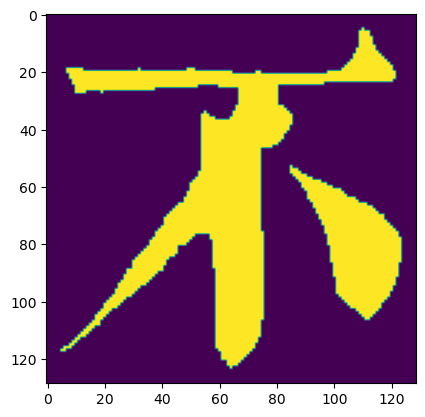

In [ ]:
p = patches[0]

k = np.ones((5,5))

p = cv2.morphologyEx(p, cv2.MORPH_CLOSE, k)
plt.imshow(p)
Image.fromarray((1-p).astype(np.uint8)*255).save('closed.jpg', quality=100)

In [ ]:
from src.ocr.distances import l2

descriptors = torch.tensor(descriptors)
n_neighs = 10
nbrs = NearestNeighbors(n_neighbors=n_neighs + 1).fit(np.array(descriptors))  # +1 to include self

sim_matrix = -torch.sqrt(l2(descriptors, descriptors)+1e-12)
sim_matrix.shape

sim_matrix[sim_matrix > 8] = 0
i = sim_matrix.sum(axis=0).argmax()

desc = descriptors[i]
img_patch = img_patches[i]

distances, indices = nbrs.kneighbors(desc[None, :])

fig, axs = plt.subplots(1, n_neighs + 1, figsize=(8, 4), sharex=True, sharey=True)

# Reference patch
ax = axs[0]
ax.imshow(resize(img_patch, (256, 256)))
ax.set_title('Reference patch')

# Nearest neighbors (skip the first result which is the reference patch itself)
for j, (idx, dist) in enumerate(zip(indices[0][1:], distances[0][1:]), 1):
    ax = axs[j]
    ax.imshow(resize(img_patches[idx], (256, 256)))
    ax.set_title(f'NN {j}\ndist: {dist:.2f}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_44995/1289029983.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  descriptors = torch.tensor(descriptors)


/home/mathis/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/mathis/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

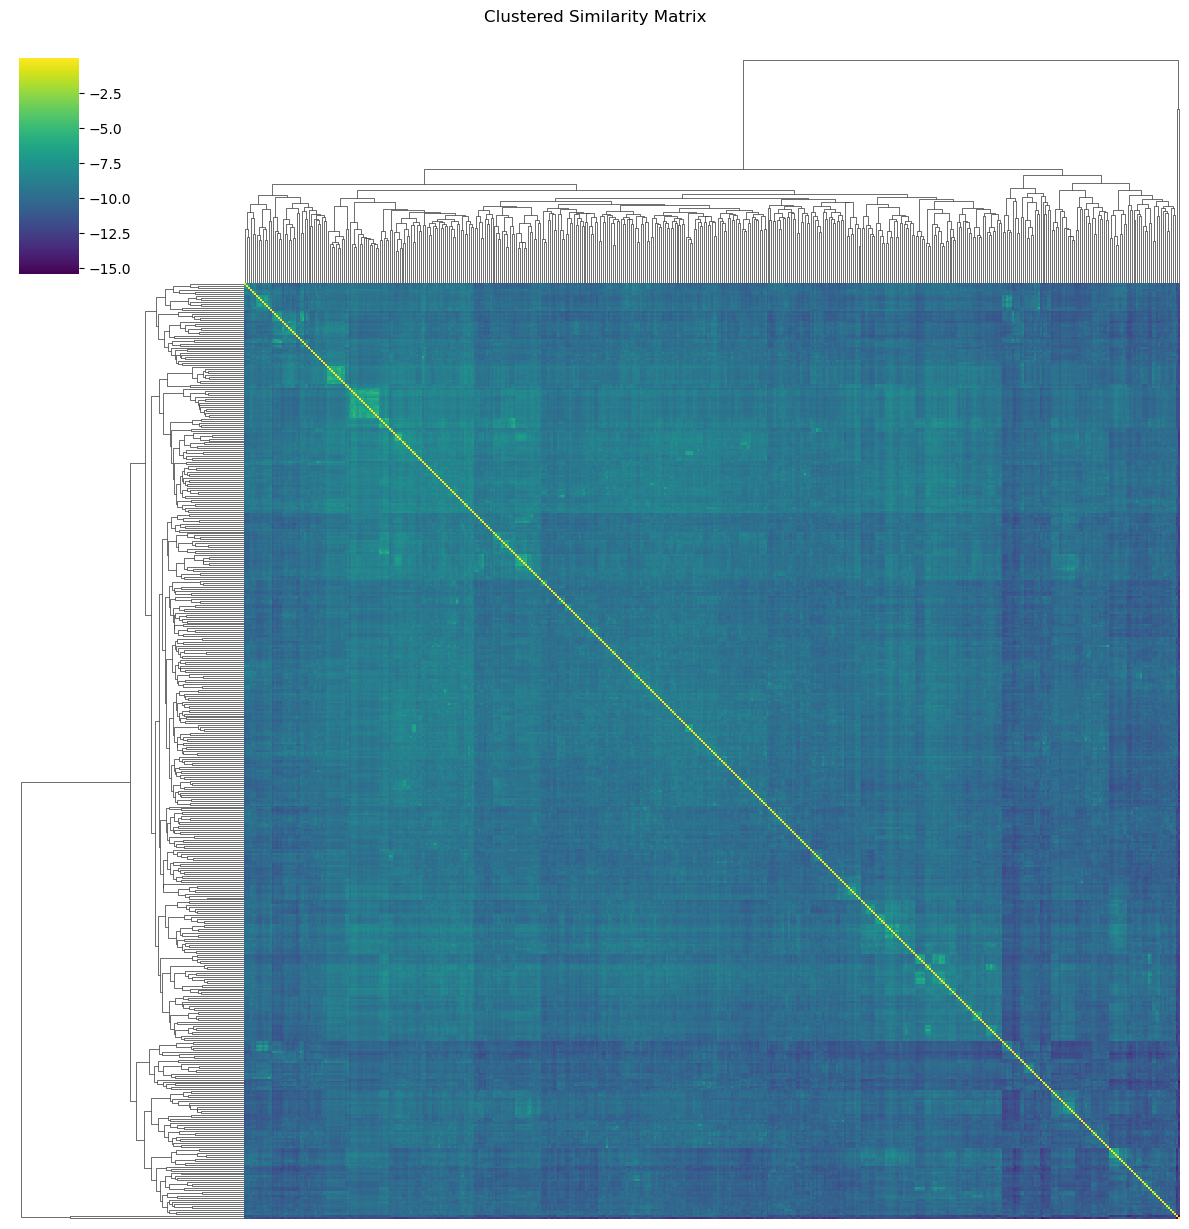

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sim_matrix[sim_matrix > 8] = 10
sim_matrix = -torch.sqrt(l2(descriptors, descriptors)+1e-12)

plt.figure(figsize=(12, 10))
clustered_grid = sns.clustermap(sim_matrix,
                                cmap='viridis',
                                figsize=(12, 12),
                                xticklabels=False,
                                yticklabels=False)
plt.suptitle('Clustered Similarity Matrix', y=1.02)
plt.show()

In [ ]:
img_patches[0].max()

231

In [ ]:
for i, patch in enumerate(patches):
    filepath = f'data/extracted/patches_bin/patch-{i}-bin.jpg'
    Image.fromarray((patch*255).astype(np.uint8)).save(filepath, quality=100)

for i, patch in enumerate(img_patches):
    filepath = f'data/extracted/patches_img/patch-{i}-img.jpg'
    Image.fromarray(patch).save(filepath, quality=100)

In [ ]:
descriptors.reshape()

TypeError: reshape() missing 1 required positional arguments: "shape"

In [ ]:
from skimage.measure import label, regionprops, regionprops_table

regions = merged_components.regions
labels = merged_components.labels

eigvects = np.zeros((len(regions), 2, 2))
eigvals = np.zeros((len(regions), 2))

for i, region in enumerate(regions):
    inertia_tensor = regions[i].inertia_tensor
    eigH = np.linalg.eigh(inertia_tensor)
    eigvects[i] = eigH.eigenvectors
    eigvals[i] = eigH.eigenvalues

NameError: name 'merged_components' is not defined

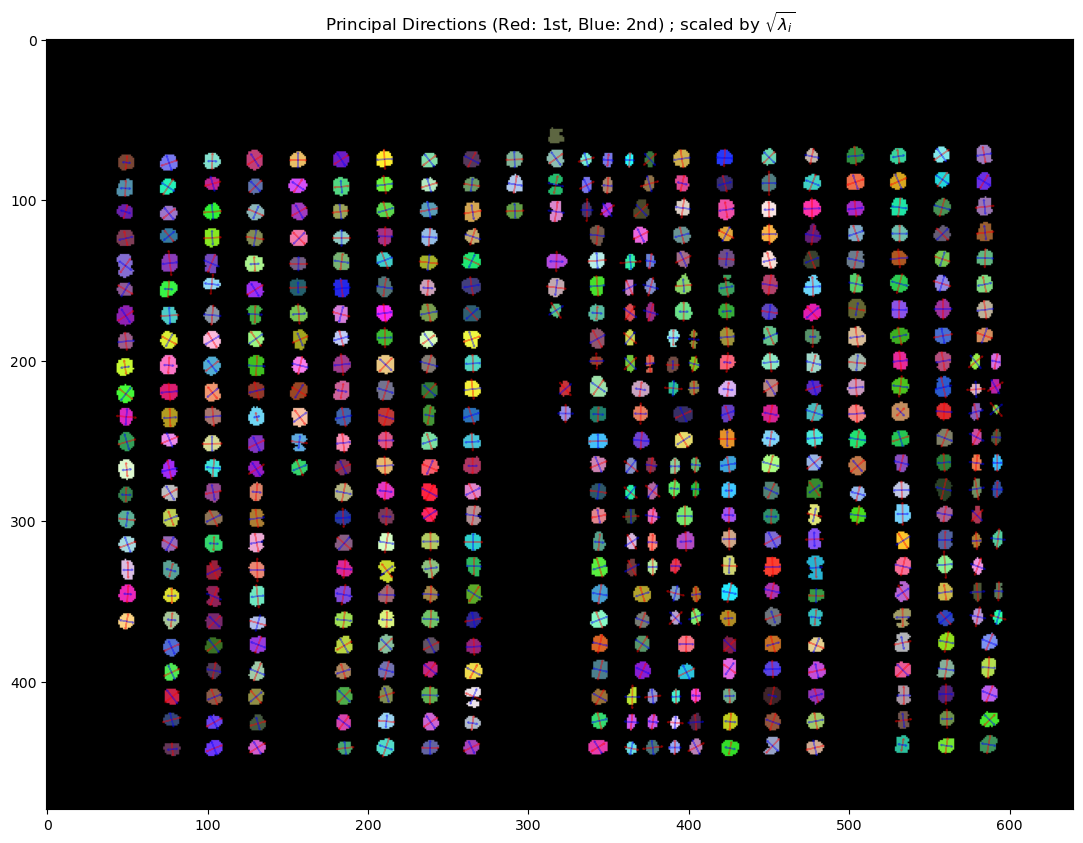

In [ ]:
alpha = 0.4
s = 2

fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(merged_components.segm_img)
plt.title("Segmentation")

for i, region in enumerate(regions[1:]):
    # Get centroid
    cy, cx = region.centroid
    
    region_eigvals = eigvals[i]
    region_eigvects = eigvects[i]

    # Plot each eigenvector scaled by sqrt(eigval)
    for j in range(len(region_eigvals)):
        eigval = region_eigvals[(j+1)%2]
        eigvec = region_eigvects[j]
        
        scale = np.sqrt(eigval) * s
        dy, dx = scale * eigvec
        
        # Use different colors for different principal directions
        color = 'red' if j == 0 else 'blue'
        
        ax.arrow(cx, cy, dx, dy, 
                head_width=1, head_length=1, 
                fc=color, ec=color, linewidth=1, 
                alpha=alpha, length_includes_head=True)
        
        # Draw opposite direction for symmetry
        ax.arrow(cx, cy, -dx, -dy, 
                head_width=1, head_length=1, 
                fc=color, ec=color, linewidth=1, 
                alpha=alpha, length_includes_head=True)

ax.set_title(r'Principal Directions (Red: 1st, Blue: 2nd) ; scaled by $\sqrt{\lambda_i}$')
plt.show()

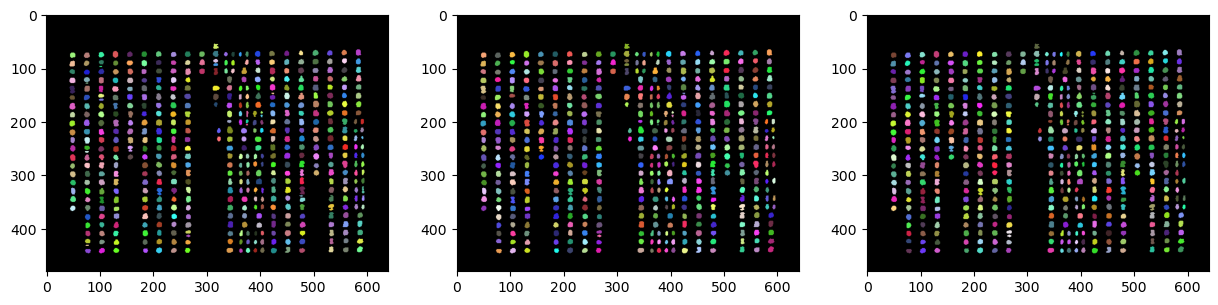

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(components.segm_img)
plt.subplot(1,3,2)
plt.imshow(filtered_components.segm_img)
plt.subplot(1,3,3)
plt.imshow(merged_components.segm_img)

## Binarize the image

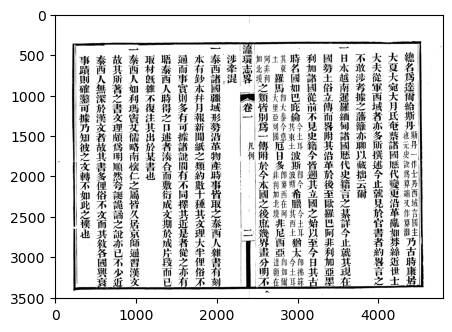

In [ ]:
from skimage.filters import threshold_otsu


# im_np = np.array(im_pil.resize((score_link.shape[1] // 2, score_link.shape[0] // 2)))
im_np = np.array(im_pil)
im_np_g = cv2.cvtColor(im_np, cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(im_np_g)
# thresh = 0.5
binary_img = im_np_g < thresh
plt.figure(figsize=(5,5))
plt.imshow(binary_img, cmap='gray_r')
plt.show()



In [ ]:
img_components = connectedComponent.from_image(binary_img.astype(np.uint8)*255)
plt.figure(figsize=(24, 16))
plt.imshow(img_components.segm_img)

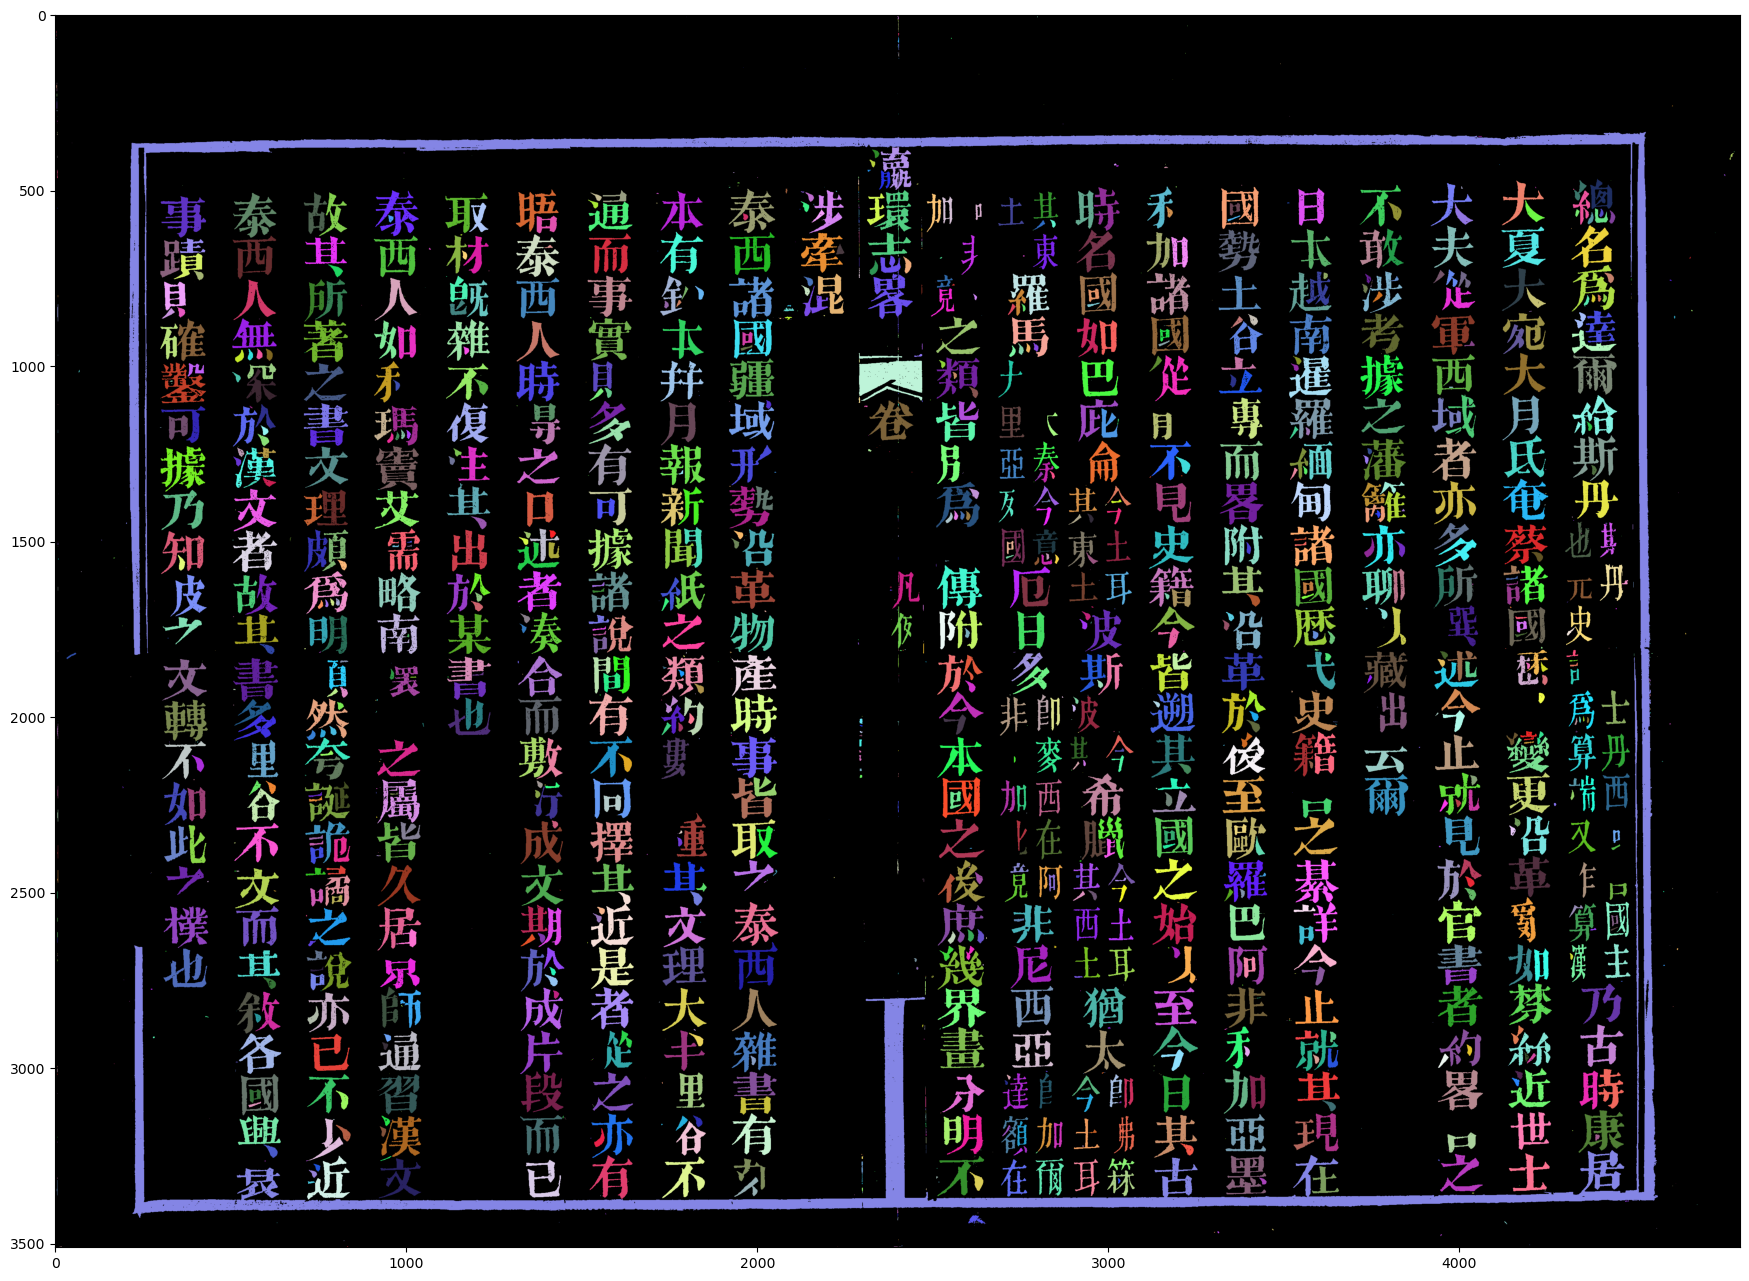

In [ ]:
def filter_image_components(model: craftWrapper, components: connectedComponent):
    # Get unique labels from the component
    unique_labels = np.unique(components.labels)
    
    # Create a set of labels to keep
    labels_to_keep = set()
    
    # Always keep the background component (label 0)
    labels_to_keep.add(0)
    
    # Filter by aspect ratio
    for i, region in enumerate(components.regions):
        # Get the actual label for this region
        # Assuming regions correspond to unique_labels[1:] (excluding background)
        if i + 1 < len(unique_labels):
            label = unique_labels[i + 1]
        else:
            continue
            
        aspect_ratio = region.axis_major_length / max(region.axis_minor_length, 1)
        if aspect_ratio > 3 and region.axis_major_length > 50:
            # Don't keep this component
            pass
        else:
            labels_to_keep.add(label)
        # if region.eccentricity < 0.9:
        #     labels_to_keep.add(label)
    
    # Apply filter: set filtered components to background
    labels = components.labels.copy()
    labels[~np.isin(labels, list(labels_to_keep))] = 0
    return connectedComponent.from_labels(labels, intensity_image=components.intensity_image)

filtered_img_components = filter_image_components(model, img_components)
plt.figure(figsize=(24, 16))
plt.imshow(filtered_img_components.segm_img)

In [ ]:
from scipy.spatial.distance import cdist
from scipy.sparse import lil_matrix, csr_matrix
import numpy as np

# def get_cc_labels(regions, labels, old_shape):    
    
#     unique_labels = np.unique(labels)
#     scores = np.zeros((len(regions), len(unique_labels)))

#     # Create the meshgrid
#     x_ = np.linspace(0, old_shape[0], labels.shape[0])
#     y_ = np.linspace(0, old_shape[1], labels.shape[1])
#     xx, yy = np.meshgrid(x_, y_, indexing='ij')
#     print(labels.shape, xx.shape, yy.shape)
#     for i, region in enumerate(regions):

#         print(f'{i} / {len(regions)}')

#         matrix = region.inertia_tensor
        
#         # Compute inverse of inertia tensor with regularization
#         reg = 1e-6
#         matrix_inv = np.linalg.inv(matrix + reg * np.eye(2))

#         for j, lbl in enumerate(unique_labels):

#             cx, cy = region.centroid
#             mask = labels == lbl            

#             # print(mask.shape, xx.shape)
#             xx_local = xx[mask]
#             yy_local = yy[mask]

#             coords = np.stack([xx_local, yy_local], axis=1)
#             # Compute Mahalanobis distance using cdist
#             mahal_distances = cdist(coords, [region.centroid], metric='mahalanobis', VI=matrix_inv)

#             scores[i, j] = mahal_distances.mean()

#     return scores

def get_cc_labels(regions, labels, old_shape):    
    
    unique_labels = np.unique(labels)
    scores = np.zeros((len(regions), len(unique_labels)))

    # Create the meshgrid ONCE
    x_ = np.linspace(0, old_shape[0], labels.shape[0])
    y_ = np.linspace(0, old_shape[1], labels.shape[1])
    xx, yy = np.meshgrid(x_, y_, indexing='ij')
    
    # Pre-compute coordinates for each label (do this ONCE)
    label_coords = {}
    for lbl in unique_labels:
        mask = labels == lbl
        xx_local = xx[mask]
        yy_local = yy[mask]
        label_coords[lbl] = np.stack([xx_local, yy_local], axis=1)
    
    print(labels.shape, xx.shape, yy.shape)
    
    # Pre-compute matrix inverses (do this ONCE per region)
    reg = 1e-6
    matrix_invs = []
    centroids = []
    
    for region in regions:
        matrix = region.inertia_tensor
        matrix_inv = np.linalg.inv(matrix + reg * np.eye(2))
        matrix_invs.append(matrix_inv)
        centroids.append(region.centroid[::-1])
    
    # Vectorized distance computation
    for i, (centroid, matrix_inv) in enumerate(zip(centroids, matrix_invs)):
        print(f'{i} / {len(regions)}')
        
        for j, lbl in enumerate(unique_labels):
            coords = label_coords[lbl]
            
            if len(coords) == 0:
                scores[i, j] = np.inf
                continue
            
            # Compute Mahalanobis distance
            mahal_distances = cdist(coords, [centroid], metric='mahalanobis', VI=matrix_inv)
            scores[i, j] = np.exp(-mahal_distances.mean() / model.params.characteristic_distance / 16)

    return scores
# Usage
scores = get_cc_labels(regions, labels_ch, labels.shape)
# potentials is now a list of sparse CSR matrices, one per region

NameError: name 'labels_ch' is not defined

In [ ]:

from typing import Union, Tuple

def distance_from_region(region, mask, old_shape):    
    # Create meshgrid in mask space
    rows = np.arange(mask.shape[0])
    cols = np.arange(mask.shape[1])
    rr, cc = np.meshgrid(rows, cols, indexing='ij')
    
    # Get coordinates where mask is True
    rr_masked = rr[mask]
    cc_masked = cc[mask]
    coords = np.stack([rr_masked, cc_masked], axis=1)  # [row, col]
    
    # Scale region properties from old_shape to mask.shape
    cy, cx = region.centroid  # (row, col) in old_shape space
    
    # Scale to mask space
    cy_scaled = cy * mask.shape[0] / old_shape[0]
    cx_scaled = cx * mask.shape[1] / old_shape[1]
    
    # Scale the inertia tensor
    scale_y = mask.shape[0] / old_shape[0]
    scale_x = mask.shape[1] / old_shape[1]
    scale_matrix = np.array([[scale_y**2, 0], [0, scale_x**2]])
    
    matrix = region.inertia_tensor * scale_matrix
    reg = 1e-6
    matrix_inv = np.linalg.inv(matrix + reg * np.eye(2))
    
    # Compute Mahalanobis distance
    centroid = np.array([[cy_scaled, cx_scaled]])  # [row, col]
    mahal_distances = cdist(coords, centroid, metric='mahalanobis', VI=matrix_inv)[:, 0]
        
    return mahal_distances, (cy_scaled, cx_scaled)

def distance_from_region_torch(
    region, 
    mask: Union[np.ndarray, torch.Tensor], 
    old_shape: Tuple[int, int],
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
) -> Union[Tuple[np.ndarray, Tuple[float, float]], Tuple[torch.Tensor, Tuple[float, float]]]:
    """
    Compute Mahalanobis distance from a region using PyTorch.
    
    Args:
        region: Region object with centroid and inertia_tensor attributes
        mask: Boolean mask (numpy or torch)
        old_shape: Original shape of the region
        device: Device to use for computation
    
    Returns:
        distances: Same type as input mask (numpy or torch)
        centroid: Scaled centroid coordinates (cy_scaled, cx_scaled)
    """
    # Check if input is numpy
    is_numpy = isinstance(mask, np.ndarray)
    
    # Convert to torch if needed
    if is_numpy:
        mask_torch = torch.from_numpy(mask).to(device)
    else:
        mask_torch = mask.to(device)
    
    # Create meshgrid in mask space
    rows = torch.arange(mask_torch.shape[0], device=device)
    cols = torch.arange(mask_torch.shape[1], device=device)
    rr, cc = torch.meshgrid(rows, cols, indexing='ij')
    
    # Get coordinates where mask is True
    rr_masked = rr[mask_torch]
    cc_masked = cc[mask_torch]
    coords = torch.stack([rr_masked, cc_masked], dim=1).float()  # [N, 2] [row, col]
    
    # Scale region properties from old_shape to mask.shape
    cy, cx = region.centroid  # (row, col) in old_shape space
    
    # Scale to mask space
    cy_scaled = cy * mask_torch.shape[0] / old_shape[0]
    cx_scaled = cx * mask_torch.shape[1] / old_shape[1]
    
    # Scale the inertia tensor
    scale_y = mask_torch.shape[0] / old_shape[0]
    scale_x = mask_torch.shape[1] / old_shape[1]
    scale_matrix = torch.tensor([[scale_y**2, 0], [0, scale_x**2]], 
                                 dtype=torch.float32, device=device)
    
    # Convert inertia tensor to torch
    if isinstance(region.inertia_tensor, np.ndarray):
        matrix = torch.from_numpy(region.inertia_tensor).float().to(device)
    else:
        matrix = torch.tensor(region.inertia_tensor, dtype=torch.float32, device=device)
    
    matrix = matrix * scale_matrix
    reg = 1e-6
    matrix_inv = torch.linalg.inv(matrix + reg * torch.eye(2, device=device))
    
    # Compute Mahalanobis distance
    centroid = torch.tensor([[cy_scaled, cx_scaled]], dtype=torch.float32, device=device)  # [1, 2] [row, col]
    
    # Manual Mahalanobis distance computation
    # diff: [N, 2]
    diff = coords - centroid
    # mahal = sqrt((x - μ)^T Σ^-1 (x - μ))
    mahal_distances = torch.sqrt(torch.sum(diff @ matrix_inv * diff, dim=1))
    
    # Convert back to numpy if input was numpy
    if is_numpy:
        mahal_distances = mahal_distances.cpu().numpy()
    
    return mahal_distances, (cy_scaled, cx_scaled)

def distance_from_region_torch(
    region, 
    mask: Union[np.ndarray, torch.Tensor], 
    old_shape: Tuple[int, int],
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
) -> Union[Tuple[np.ndarray, Tuple[float, float]], Tuple[torch.Tensor, Tuple[float, float]]]:
    """
    Compute Mahalanobis distance from a region using PyTorch.
    
    Args:
        region: Region object with centroid and inertia_tensor attributes
        mask: Boolean mask (numpy or torch)
        old_shape: Original shape of the region
        device: Device to use for computation
    
    Returns:
        distances: Same type as input mask (numpy or torch)
        centroid: Scaled centroid coordinates (cy_scaled, cx_scaled)
    """
    # Check if input is numpy
    is_numpy = isinstance(mask, np.ndarray)
    
    # Convert to torch if needed
    if is_numpy:
        mask_torch = torch.from_numpy(mask).to(device)
    else:
        mask_torch = mask.to(device)
    
    # Create meshgrid in mask space
    rows = torch.arange(mask_torch.shape[0], device=device)
    cols = torch.arange(mask_torch.shape[1], device=device)
    rr, cc = torch.meshgrid(rows, cols, indexing='ij')
    
    # Get coordinates where mask is True
    rr_masked = rr[mask_torch]
    cc_masked = cc[mask_torch]
    coords = torch.stack([rr_masked, cc_masked], dim=1).float()  # [N, 2] [row, col]
    
    # Scale region properties from old_shape to mask.shape
    cy, cx = region.centroid  # (row, col) in old_shape space
    
    # Scale to mask space
    cy_scaled = cy * mask_torch.shape[0] / old_shape[0]
    cx_scaled = cx * mask_torch.shape[1] / old_shape[1]
    
    # Scale the inertia tensor
    scale_y = mask_torch.shape[0] / old_shape[0]
    scale_x = mask_torch.shape[1] / old_shape[1]
    scale_matrix = torch.tensor([[scale_y**2, 0], [0, scale_x**2]], 
                                 dtype=torch.float32, device=device)
    
    # Convert inertia tensor to torch
    if isinstance(region.inertia_tensor, np.ndarray):
        matrix = torch.from_numpy(region.inertia_tensor).float().to(device)
    else:
        matrix = torch.tensor(region.inertia_tensor, dtype=torch.float32, device=device)
    
    matrix = matrix * scale_matrix
    reg = 1e-6
    matrix_inv = torch.linalg.inv(matrix + reg * torch.eye(2, device=device))
    
    # Compute Mahalanobis distance
    centroid = torch.tensor([[cy_scaled, cx_scaled]], dtype=torch.float32, device=device)  # [1, 2] [row, col]
    
    # Manual Mahalanobis distance computation
    # diff: [N, 2]
    diff = coords - centroid
    # mahal = sqrt((x - μ)^T Σ^-1 (x - μ))
    mahal_distances = torch.sqrt(torch.sum(diff @ matrix_inv * diff, dim=1))
    
    # Convert back to numpy if input was numpy
    if is_numpy:
        mahal_distances = mahal_distances.cpu().numpy()
    
    return mahal_distances, (cy_scaled, cx_scaled)

# # Usage
# reg = np.random.choice(regions)

# mahal_distances, (cy_scaled, cx_scaled) = distance_from_region_torch(reg, mask=img_components.labels != 0, 
#                                                     old_shape=merged_components.labels.shape)
# # Create output array
# distances = np.full(img_components.labels.shape, fill_value=np.nan)
# distances[img_components.labels != 0] = mahal_distances

# plt.figure(figsize=(15,10))
# plt.imshow(distances, interpolation='nearest')
# plt.colorbar()
# plt.scatter(cx_scaled, cy_scaled)  # or use cy_scaled, cx_scaled depending on your needs

In [ ]:
import torch
from typing import Union, Tuple

def compute_all_distances_torch(
    regions,
    labels: Union[np.ndarray, torch.Tensor],
    old_shape: Tuple[int, int],
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
    batch_size: int = None
) -> np.ndarray:
    """
    Compute mean Mahalanobis distances from all regions to all labels efficiently.
    
    Args:
        regions: List of region objects with centroid and inertia_tensor attributes
        labels: Label image (numpy or torch)
        old_shape: Original shape of the regions
        device: Device to use for computation
        batch_size: Process labels in batches to save memory (default: all at once)
    
    Returns:
        scores: Array of shape [n_regions, n_labels] with mean distances
    """
    # Convert to torch if needed
    is_numpy = isinstance(labels, np.ndarray)
    if is_numpy:
        labels_torch = torch.from_numpy(labels).to(device)
    else:
        labels_torch = labels.to(device)
    
    unique_labels = torch.unique(labels_torch)
    n_labels = len(unique_labels)
    n_regions = len(regions)
    
    # Pre-allocate scores
    scores = torch.zeros((n_regions, n_labels), device=device)
    
    # Pre-compute scaling factors
    scale_y = labels_torch.shape[0] / old_shape[0]
    scale_x = labels_torch.shape[1] / old_shape[1]
    scale_matrix = torch.tensor([[scale_y**2, 0], [0, scale_x**2]], 
                                 dtype=torch.float32, device=device)
    
    # Create meshgrid once
    rows = torch.arange(labels_torch.shape[0], device=device, dtype=torch.float32)
    cols = torch.arange(labels_torch.shape[1], device=device, dtype=torch.float32)
    rr, cc = torch.meshgrid(rows, cols, indexing='ij')
    coords_grid = torch.stack([rr, cc], dim=-1)  # [H, W, 2]
    
    # Process each region
    for i, region in enumerate(regions):
        if i % 10 == 0:
            print(f'Processing {i} / {n_regions}')
        
        # Scale region properties
        cy, cx = region.centroid
        cy_scaled = cy * scale_y
        cx_scaled = cx * scale_x
        centroid = torch.tensor([cy_scaled, cx_scaled], dtype=torch.float32, device=device)
        
        # Scale and invert the inertia tensor
        if isinstance(region.inertia_tensor, np.ndarray):
            matrix = torch.from_numpy(region.inertia_tensor).float().to(device)
        else:
            matrix = torch.tensor(region.inertia_tensor, dtype=torch.float32, device=device)
        
        matrix = matrix * scale_matrix
        reg = 1e-6
        matrix_inv = torch.linalg.inv(matrix + reg * torch.eye(2, device=device))
        
        # Compute distances for all pixels at once
        diff = coords_grid - centroid  # [H, W, 2]
        # Mahalanobis: sqrt((x - μ)^T Σ^-1 (x - μ))
        mahal_sq = torch.sum((diff @ matrix_inv) * diff, dim=-1)  # [H, W]
        mahal_distances = torch.sqrt(torch.clamp(mahal_sq, min=0))  # Clamp for numerical stability
        
        # Compute mean distance for each label
        if batch_size is None:
            # Process all labels at once (faster but more memory)
            for j, lbl in enumerate(unique_labels):
                mask = labels_torch == lbl
                if mask.any():
                    scores[i, j] = mahal_distances[mask].mean()
                else:
                    scores[i, j] = float('nan')
        else:
            # Process labels in batches (more memory efficient)
            for batch_start in range(0, n_labels, batch_size):
                batch_end = min(batch_start + batch_size, n_labels)
                for j in range(batch_start, batch_end):
                    lbl = unique_labels[j]
                    mask = labels_torch == lbl
                    if mask.any():
                        scores[i, j] = mahal_distances[mask].mean()
                    else:
                        scores[i, j] = float('nan')
    
    # Convert back to numpy if needed
    if is_numpy:
        return scores.cpu().numpy()
    else:
        return scores


# Usage (drop-in replacement for your original code)
scores = compute_all_distances_torch(
    merged_components.regions,
    img_components.labels,
    old_shape=merged_components.labels.shape
)

print(f"Scores shape: {scores.shape}")
print(f"Score range: [{np.nanmin(scores):.2f}, {np.nanmax(scores):.2f}]")

Processing 0 / 445
Processing 10 / 445
Processing 20 / 445
Processing 30 / 445
Processing 40 / 445
Processing 50 / 445
Processing 60 / 445
Processing 70 / 445
Processing 80 / 445
Processing 90 / 445
Processing 100 / 445
Processing 110 / 445
Processing 120 / 445
Processing 130 / 445
Processing 140 / 445
Processing 150 / 445
Processing 160 / 445
Processing 170 / 445
Processing 180 / 445
Processing 190 / 445
Processing 200 / 445
Processing 210 / 445
Processing 220 / 445
Processing 230 / 445
Processing 240 / 445
Processing 250 / 445
Processing 260 / 445
Processing 270 / 445
Processing 280 / 445
Processing 290 / 445
Processing 300 / 445
Processing 310 / 445
Processing 320 / 445
Processing 330 / 445
Processing 340 / 445
Processing 350 / 445
Processing 360 / 445
Processing 370 / 445
Processing 380 / 445
Processing 390 / 445
Processing 400 / 445
Processing 410 / 445
Processing 420 / 445
Processing 430 / 445
Processing 440 / 445
Scores shape: (445, 2467)
Score range: [0.14, 723.57]


In [ ]:
scores.shape, selected.shape, len(img_components.regions)

((445, 2467), (2467,), 2466)

In [ ]:
selected = scores.argmin(axis=0)[1:]

selected[scores.min(axis=0) > 200] = 0

vis = np.zeros((*img_components.labels.shape, 3), dtype=np.uint8)

unique_merged_components = np.unique(merged_components.labels)
plt.figure(figsize=(16, 10))

for selected_index, region in zip(selected, img_components.regions):
        
    if selected_index == 0:
        continue
    color = merged_components.colors[selected_index]
    vis[img_components.labels == region.label] = color

for i, region in enumerate(merged_components.regions):
    cx, cy = region.centroid
    cx *= img_components.labels.shape[0] / merged_components.labels.shape[0]
    cy *= img_components.labels.shape[1] / merged_components.labels.shape[1]
    
    # Get the best character for this region
    colors = merged_components.colors[i]
    plt.scatter(cy, cx, c=colors.reshape(1, -1) / 255.0, s=15, alpha=1, edgecolors='white', linewidths=1)



plt.imshow(vis)


NameError: name 'scores' is not defined

In [ ]:
result = distances_from_region(regions,mask=img_components.labels != 0, 
                                                    old_shape=merged_components.labels.shape)

(878, 1200) (878, 1200) (878, 1200) (480, 640)


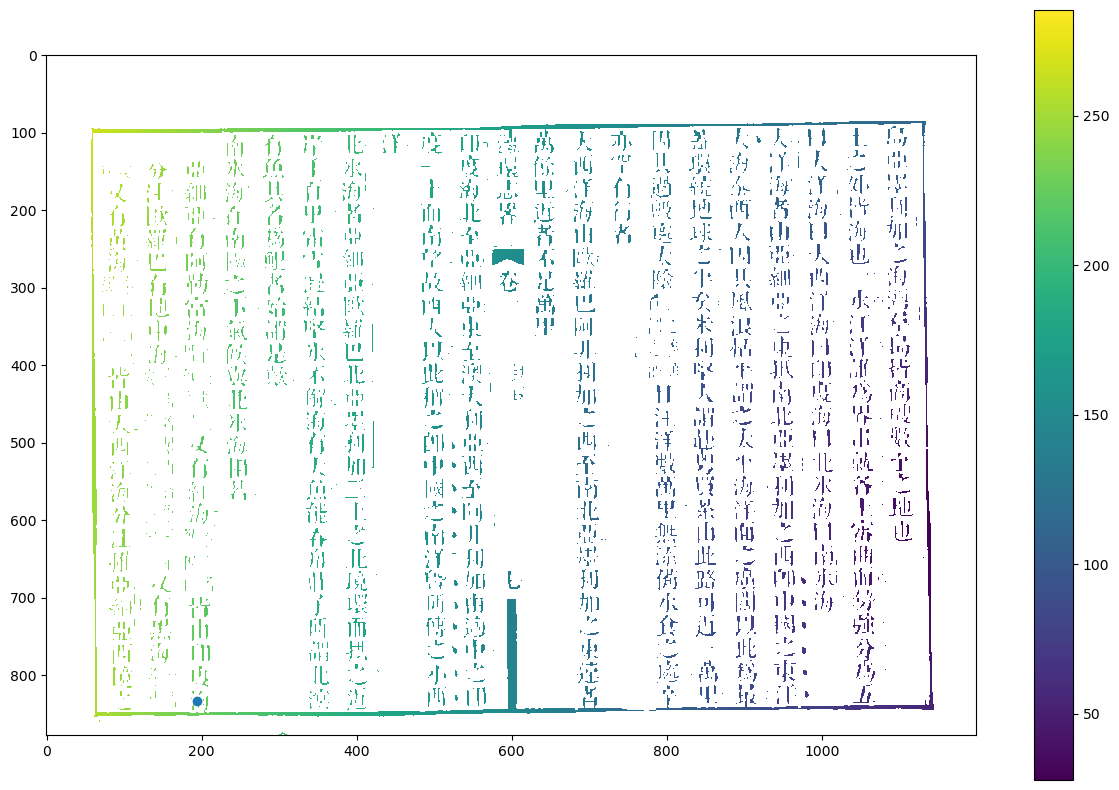

In [ ]:
reg = np.random.choice(regions)
res = distance_from_region(reg, mask=img_components.labels != 0, old_shape=merged_components.labels.shape)

plt.figure(figsize=(15,10))

plt.imshow(res)
plt.colorbar()

cy, cx = region.centroid
cx *= img_components.labels.shape[0]/merged_components.labels.shape[0]
cy *= img_components.labels.shape[1]/merged_components.labels.shape[1]


plt.scatter(cx, cy)
